#FTSE100 data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
raw_cvs_data = pd.read_csv('FTSE100.csv')
df_ftse100=raw_cvs_data.copy()
df_ftse100.date = pd.to_datetime(df_ftse100.date, dayfirst = True)
df_ftse100.set_index("date", inplace=True)
df_ftse100=df_ftse100.asfreq('b')
data=df_ftse100.fillna(method='ffill')

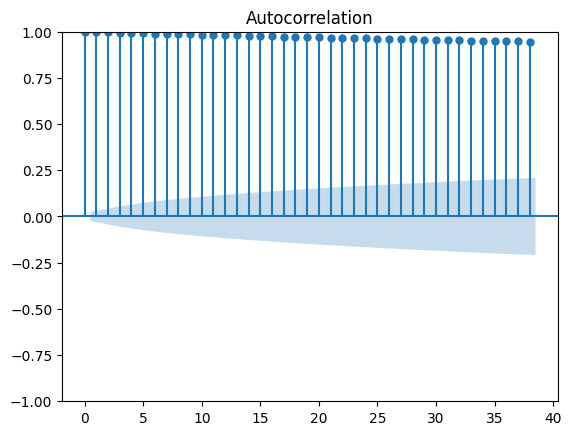

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)
plt.show()

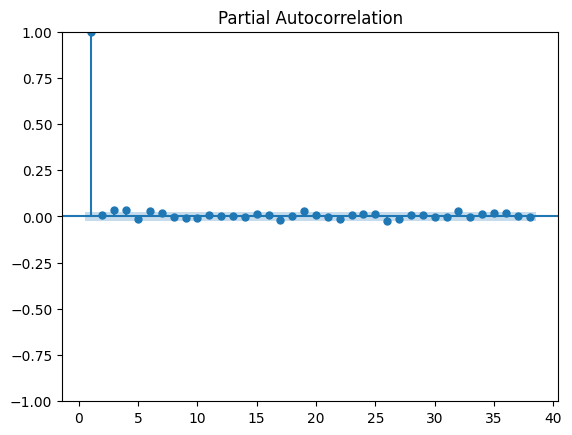

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data,zero=False)
plt.show()

#Applying models

In [ ]:
size = int(len(data)*0.8)
df, df_test = data.iloc[:size], data.iloc[size:]

In [ ]:
model = ARIMA(df,order =(3,2,2))

In [ ]:
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions = results.predict(start=len(df+1), end= len(df)+len(df_test)-1, dynamic=False)
#print(len(predictions))
#for i in range(len(predictions)):
#print('predicted=%f, expected=%f' % (predictions[i], df_test.ftse[i]))
rmse = sqrt(mean_squared_error(df_test.ftse, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 386.766


In [ ]:
test=df_test

In [ ]:
test['prediction']=predictions

<ipython-input-11-9490a2583a1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=predictions


In [ ]:
test['difference']=test["ftse"]-test['prediction']
print(test)

                   ftse   prediction  difference
date                                            
2013-04-08  6276.940000  6263.796935   13.143065
2013-04-09  6313.200000  6271.717674   41.482326
2013-04-10  6387.370000  6277.488605  109.881395
2013-04-11  6416.140000  6274.205443  141.934557
2013-04-12  6384.390000  6275.435966  108.954034
...                 ...          ...         ...
2018-01-23  7731.827774  7026.419341  705.408433
2018-01-24  7643.428966  7027.021701  616.407265
2018-01-25  7615.839954  7027.624062  588.215892
2018-01-26  7665.541292  7028.226422  637.314870
2018-01-29  7671.533300  7028.828783  642.704517

[1256 rows x 3 columns]


<ipython-input-12-b4f71aa9568c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['difference']=test["ftse"]-test['prediction']


In [ ]:
df = pd.DataFrame({'Actual': test.ftse, 'Predicted': test.prediction})

<Axes: xlabel='date'>

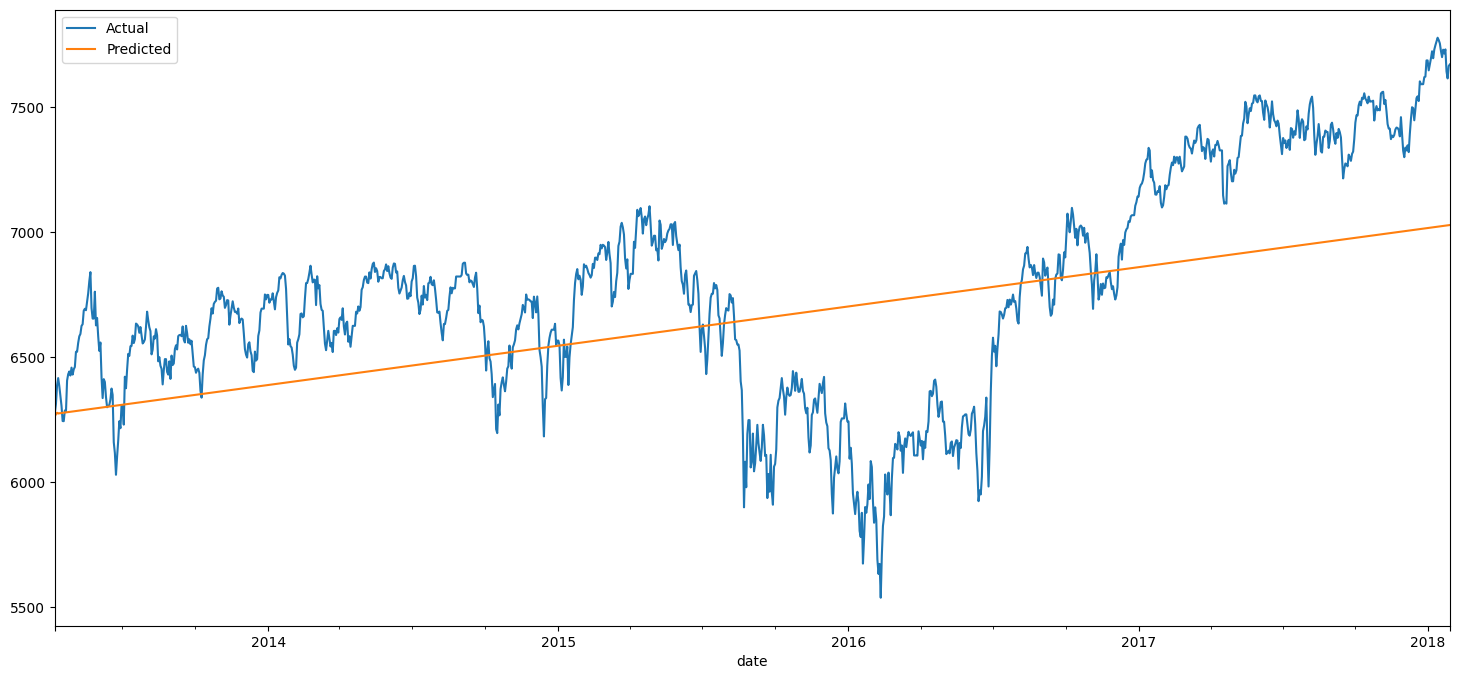

In [ ]:
df.plot(kind='line',figsize=(18,8))